# Sprint ディープラーニングフレームワーク2

## 1.このSprintについて

### Sprintの目的
- フレームワークのコードを読めるようにする
- フレームワークを習得し続けられるようになる
- 理論を知っている範囲をフレームワークで動かす

### どのように学ぶか
- 前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。

## 2.公式Example

深層学習フレームワークには公式に様々なモデルのExampleコードが公開されています。

## 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


<a href="https://www.tensorflow.org/tutorials/">models/tutorials at master · tensorflow/models</a>



### 【結果】
実施内容は下記

<a href="https://github.com/obata01/diveintocode-ml/blob/master/kadai/Sprint14/kadai/Keras-TransferLearning.ipynb" style="text-decoration:none">Kerasチュートリアル - 転移学習 実行内容</a>

## 【問題2】（アドバンス課題）様々な手法を実行
TensorFLowやGoogle AI ResearchのGitHubリポジトリには、定番のモデルから最新のモデルまで多様なコードが公開されています。これらから興味あるものを選び実行してください。


なお、これらのコードは初学者向けではないため、巨大なデータセットのダウンロードが必要な場合など、実行が簡単ではないこともあります。そういった場合は、コードリーディングを行ってください。


models/research at master · tensorflow/models


google-research/google-research: Google AI Research


更新日が古いものはPythonやTensorFlowのバージョンが古く、扱いずらい場合があります。新しいものから見ることを推奨します。

## 3.異なるフレームワークへの書き換え

「ディープラーニングフレームワーク1」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。


- Iris（Iris-versicolorとIris-virginicaのみの2値分類）
- Iris（3種類全ての目的変数を使用して多値分類）
- House Prices
- MNIST

### Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。

KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。

## 【準備】

In [ ]:
# !pip install torchviz

In [ ]:
# ライブラリインポート
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import pickle
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

# TensorFlow Keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from keras.datasets import mnist
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.utils import plot_model

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
# from torchviz import make_dot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls "/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint13/data/Iris.csv"

'/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint13/data/Iris.csv'


In [ ]:
PATH = "/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint13/data/"

## 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [ ]:
# CSV読み込み
df = pd.read_csv(os.path.join(PATH, 'Iris.csv'))
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=True)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((64, 4), (20, 4), (16, 4), (64, 1), (20, 1), (16, 1))

### ★ Sequential

In [ ]:
K.clear_session()
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(4,), name='layer1'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=64, activation='relu', name='layer2'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=1, activation='sigmoid', name='output_layer'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                320       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# %%timeit
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=20,
                    shuffle=True,
                    validation_data=(X_val, y_val))

Num GPUs Available:  1
Epoch 1/30
4/4 [==============================] - 0s 38ms/step - loss: 0.8185 - accuracy: 0.4688 - val_loss: 0.7428 - val_accuracy: 0.3750
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7790 - accuracy: 0.5469 - val_loss: 0.7269 - val_accuracy: 0.3750
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7542 - accuracy: 0.4219 - val_loss: 0.7098 - val_accuracy: 0.3750
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7940 - accuracy: 0.5156 - val_loss: 0.7246 - val_accuracy: 0.3750
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7241 - accuracy: 0.5156 - val_loss: 0.6839 - val_accuracy: 0.3750
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7268 - accuracy: 0.5625 - val_loss: 0.7241 - val_accuracy: 0.3750
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7113 - accuracy: 0.5781 - val_loss: 0.7303 - val_accuracy: 0.3750
Epoch 8/30

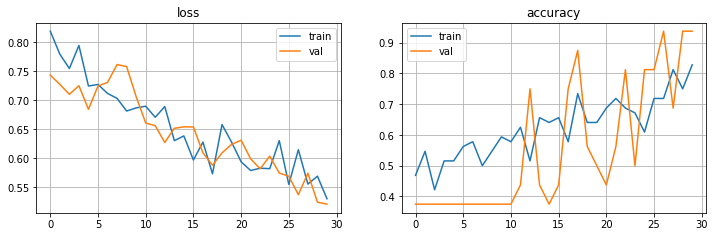

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='val')
ax2.set_title('accuracy')
ax2.grid(True)
ax2.legend(loc='best')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
results

1/1 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.8500


[0.5157154202461243, 0.8500000238418579]

In [ ]:
y_pred = model.predict(X_test, verbose=1, batch_size=32)
y_pred = np.where(y_pred > 0.5, 1, 0).astype(int).squeeze()
y_pred

1/1 [==============================] - 0s 1ms/step


array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

### ★ Functional API

In [ ]:
K.clear_session()
input_tensor = Input(shape=(4))
x = layers.Dense(64, activation='relu')(input_tensor)
x = layers.Dense(64, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)

model = Model(input_tensor, output_tensor)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
2/2 [==============================] - 0s 58ms/step - loss: 0.9353 - accuracy: 0.4688 - val_loss: 0.7072 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 0.8125 - accuracy: 0.4688 - val_loss: 0.6752 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 0.7231 - accuracy: 0.4688 - val_loss: 0.6744 - val_accuracy: 0.6250
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6858 - accuracy: 0.4688 - val_loss: 0.6964 - val_accuracy: 0.3750
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6690 - accuracy: 0.5312 - val_loss: 0.7256 - val_accuracy: 0.3750
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6681 - accuracy: 0.5312 - val_loss: 0.7430 - val_accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6739 - accuracy: 0.5312 - val_loss: 0.7536 - val_accuracy: 0.3750
Epoch 8/10
2/2 [=================

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5000


[0.6762655377388, 0.5]

In [ ]:
y_pred = np.where(model.predict(X_test, batch_size=32, verbose=1) > 0.5, 1, 0).astype(int).squeeze()
y_pred

1/1 [==============================] - 0s 4ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### ★ Model Subclassing

In [ ]:
K.clear_session()

class TestModel01(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(64)
        self.activation1 = layers.Activation('relu', name='ac1')
        self.fc2 = layers.Dense(64)
        self.activation2 = layers.Activation('relu', name='ac2')
        self.dropout = layers.Dropout(0.3)
        self.out = layers.Dense(1)
        self.activation_out = layers.Activation('sigmoid', name='ac_out')

    def call(self, inputs, training=None):    # 引数training は Dropout等で使用
        x = self.activation1(self.fc1(inputs))
        x = self.activation2(self.fc2(x))
        x = self.dropout(x, training=training)
        x = self.activation_out(self.out(x))
        return x

In [ ]:
# 最適化アルゴリズム
optimizer = tf.keras.optimizers.Adam()

# 損失関数
loss_object = tf.keras.losses.BinaryCrossentropy()

# 評価関数
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Accuracy(name='train_accuracy')
valid_loss = tf.keras.metrics.Mean(name='valid_loss')
valid_accuracy = tf.keras.metrics.Accuracy(name='valid_accuracy')

# 入力データ(NumPy多次元配列のデータ型をデータセット（テンソル）用に統一)
X_train_f32 = X_train.astype('float32')
y_train_f32 = y_train.astype('float32')
X_val_f32 = X_val.astype('float32')
y_val_f32 = y_val.astype('float32')
X_test_f32 = X_test.astype('float32')
y_test_f32 = y_test.astype('float32')

# 入力データと教師データを TensorSliceDatasetにまとめる
train_sliced = tf.data.Dataset.from_tensor_slices((X_train_f32, y_train_f32))
valid_sliced = tf.data.Dataset.from_tensor_slices((X_val_f32, y_val_f32))
test_sliced = tf.data.Dataset.from_tensor_slices((X_test_f32, y_test_f32))

# 確認 ※自己学習用
print('----------------TensorSliceDataset-------------------')
print(train_sliced)
for i in train_sliced.take(5):
    print(i)
    tf.print(i)

# BatchDataset
BATCH_SIZE = 10
train_dataset = train_sliced.shuffle(len(train_sliced)).batch(BATCH_SIZE)
valid_dataset = valid_sliced.batch(BATCH_SIZE)
test_dataset = test_sliced.batch(BATCH_SIZE)
# ※shuffle : 訓練時には基本的にシャッフルが必要。shuffle(バッファサイズ)メソッドのバッファサイズの部分には（基本的に）全データ件数以上を指定する

# 確認 ※自己学習用
print('------------------BatchDataset-----------------')
print(train_dataset)
for i in train_dataset.take(1):
    # print(i)
    tf.print(i)

----------------TensorSliceDataset-------------------
<TensorSliceDataset shapes: ((4,), (1,)), types: (tf.float32, tf.float32)>
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.6, 2.8, 4.9, 2. ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
([5.6 2.8 4.9 2], [1])
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.8, 2.6, 4. , 1.2], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>)
([5.8 2.6 4 1.2], [0])
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.9, 3. , 5.1, 1.8], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
([5.9 3 5.1 1.8], [1])
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.8, 2.7, 4.1, 1. ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>)
([5.8 2.7 4.1 1], [0])
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.5, 1.8], dtype=float32)>, <tf.Tensor: shape=(1,), dtyp

In [ ]:
# 学習用
# @tf.function
def train_step(train_X, train_y):
    training = True
    K.set_learning_phase(training)

    with tf.GradientTape() as tape:
        pred_y = model(train_X, training=training)
        loss = loss_object(pred_y, train_y)

    gradient = tape.gradient(loss, model.trainable_weights)  # 自動微分（勾配計算）
    optimizer.apply_gradients(zip(gradient, model.trainable_weights))  # 更新

    train_loss(loss)
    train_accuracy(train_y, np.where(pred_y > 0.5, 1, 0))

In [ ]:
# 検証用
# @tf.function
def valid_step(valid_X, valid_y):
    training = False
    K.set_learning_phase(training)

    pred_y = model(valid_X, training=training)
    pred_y = np.where(pred_y > 0.5, 1, 0)
    loss = loss_object(pred_y, valid_y)

    valid_loss(loss)
    valid_accuracy(valid_y, np.where(pred_y > 0.5, 1, 0))

In [ ]:
# エポック数
EPOCHS = 30

# 損失履歴
train_history = []
valid_history = []

model = TestModel01()

for epoch in tqdm(range(EPOCHS)):
    train_loss.reset_states()
    train_accuracy.reset_states()
    valid_loss.reset_states()
    valid_accuracy.reset_states()

    for train_X, train_y in train_dataset:
        train_step(train_X, train_y)

    for valid_X, valid_y in valid_dataset:
        valid_step(valid_X, valid_y)

    avg_loss = train_loss.result()
    avg_acc = train_accuracy.result()
    avg_val_loss = valid_loss.result()
    avg_val_acc = valid_accuracy.result()

    train_history.append(avg_loss)
    valid_history.append(avg_val_loss)

    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, acc: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f}'\
          .format(epoch+1, EPOCHS, avg_loss, avg_acc, avg_val_loss, avg_val_acc))

print('Finished Training')
# print(model.get_weights())  # 学習後のパラメーターの情報を表示

# predict
pred = np.where(model(X_test_f32) > 0.5, 1, 0)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
[Epoch 1/30] loss: 7.29004, acc: 0.65625, val_loss: 10.79746, val_acc: 0.37500
[Epoch 2/30] loss: 7.32442, acc: 0.56250, val_loss: 10.79746, val_acc: 0.37500
[Epoch 3/30] loss: 7.26068, acc: 0.53125, val_loss: 10.79746, val_acc: 0.37500
[Epoch 4/30] loss: 6.74908, acc: 0.53125, val_loss: 10.79746, val_acc: 0.37500
[Epoch 5/30] loss: 6.70573, acc: 0.56250, val_loss: 10.79746, val_acc: 0.37500
[Epoch 6/30] loss: 6.81827, acc: 0.53125, val_loss: 10.79746, val_acc: 0.37500
[Epoch 7/30] loss: 6.58102, acc: 0.53125, val_loss: 10.79746, val_acc: 0.37500
[Epoch 8/30] loss: 6.66862, acc: 0.53125, val_loss: 10.79746, val_acc: 0.37500
[Epoch 9/30] loss: 6.87788, acc: 0.53125, val_loss: 10.79746, val_acc: 0.37500
[Epoch 10/30] loss: 6.45172, acc: 0.54688, val_loss: 10.79746, val_acc: 0.37500
[Epoch 11/30] loss: 6.89309, acc: 0.57812, val_loss: 10.79746, val_acc: 0.3

In [ ]:
print(pred.squeeze())
print(y_test.squeeze())
accuracy_score(pred, y_test)

[0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


0.8

## 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。



In [ ]:
# CSV読み込み
df = pd.read_csv(os.path.join(PATH, 'Iris.csv'))
df['Species'].unique()
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]
# One-Hot
y = to_categorical(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, shuffle=True)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99, shuffle=True)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((96, 4), (30, 4), (24, 4), (96, 3), (30, 3), (24, 3))

### ★ Sequential

In [ ]:
K.clear_session()
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(4,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=3, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
            #   loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=30,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/30
4/4 [==============================] - 0s 33ms/step - loss: 1.6027 - accuracy: 0.3333 - val_loss: 1.1045 - val_accuracy: 0.3333
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 1.2451 - accuracy: 0.3958 - val_loss: 0.9385 - val_accuracy: 0.3750
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 1.1416 - accuracy: 0.3646 - val_loss: 0.8520 - val_accuracy: 0.5417
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0756 - accuracy: 0.4167 - val_loss: 0.8159 - val_accuracy: 0.6667
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.9698 - accuracy: 0.4583 - val_loss: 0.7948 - val_accuracy: 0.6667
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 0.9051 - accuracy: 0.5833 - val_loss: 0.7611 - val_accuracy: 0.6667
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.9024 - accuracy: 0.5729 - val_loss: 0.7177 - val_accuracy: 0.7083
Epoch 8/30
4/4 [=================

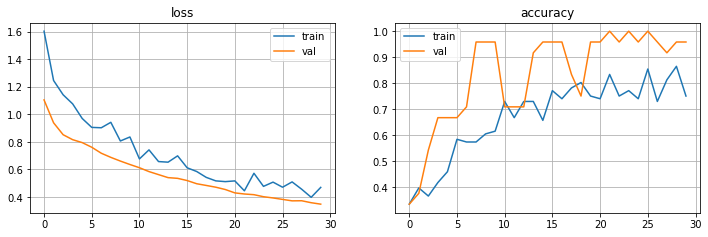

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='val')
ax2.set_title('accuracy')
ax2.grid(True)
ax2.legend(loc='best')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.9333


[0.4035482704639435, 0.9333333373069763]

In [ ]:
y_pred = tf.argmax(model.predict(X_test), axis=1)
print(y_pred)

tf.Tensor([2 0 1 2 0 1 1 2 0 2 2 1 2 1 2 0 0 1 1 2 2 1 0 1 2 0 0 2 1 2], shape=(30,), dtype=int64)


### ★ Functional API

In [ ]:
K.clear_session()
input_tensor = Input(shape=(4,))
x = layers.Dense(units=64, activation='relu')(input_tensor)
x = layers.Dense(units=64, activation='relu')(x)
output_tensor = layers.Dense(units=3, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, 
                    y_train,
                    batch_size=32,
                    epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
3/3 [==============================] - 0s 43ms/step - loss: 1.2765 - accuracy: 0.0000e+00 - val_loss: 1.1684 - val_accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 1.1603 - accuracy: 0.1875 - val_loss: 1.0921 - val_accuracy: 0.3333
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 1.0926 - accuracy: 0.3333 - val_loss: 1.0424 - val_accuracy: 0.4167
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 1.0500 - accuracy: 0.4271 - val_loss: 1.0031 - val_accuracy: 0.5417
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 1.0073 - accuracy: 0.4792 - val_loss: 0.9641 - val_accuracy: 0.4167
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 0.9699 - accuracy: 0.5208 - val_loss: 0.9272 - val_accuracy: 0.6667
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.9247 - accuracy: 0.6875 - val_loss: 0.8932 - val_accuracy: 0.6667
Epoch 8/30
3/3 [=========

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.9000


[0.43001028895378113, 0.8999999761581421]

In [ ]:
y_pred = tf.argmax(model.predict(X_test), axis=1)
y_pred

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 2, 0, 0, 2, 1, 2])>

### ★ Model Subclassing

In [ ]:
K.clear_session()

class TestModel02(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(64)
        self.activation1 = layers.LeakyReLU(alpha=0.3)
        self.batch_norm = layers.BatchNormalization()
        self.fc2 = layers.Dense(64)
        self.activation2 = layers.LeakyReLU(alpha=0.3)
        self.dropout = layers.Dropout(0.3)
        self.out = layers.Dense(3)
        self.activation_out = layers.Softmax()

    def call(self, inputs, training=None):    # 引数training は Dropout等で使用
        x = self.activation1(self.fc1(inputs))
        x = self.batch_norm(x, training=False)
        x = self.activation2(self.fc2(x))
        x = self.dropout(x, training=training)
        x = self.activation_out(self.out(x))
        return x

# 最適化アルゴリズム
optimizer = tf.keras.optimizers.Adam()

# 損失関数
loss_object = tf.keras.losses.CategoricalCrossentropy()

# 評価関数
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Accuracy(name='train_accuracy')
valid_loss = tf.keras.metrics.Mean(name='valid_loss')
valid_accuracy = tf.keras.metrics.Accuracy(name='valid_accuracy')

# 入力データ(NumPy多次元配列のデータ型をデータセット（テンソル）用に統一)
X_train_f32 = X_train.astype('float32')
y_train_f32 = y_train.astype('float32')
X_val_f32 = X_val.astype('float32')
y_val_f32 = y_val.astype('float32')
X_test_f32 = X_test.astype('float32')
y_test_f32 = y_test.astype('float32')

# 入力データと教師データを TensorSliceDatasetにまとめる
train_sliced = tf.data.Dataset.from_tensor_slices((X_train_f32, y_train_f32))
valid_sliced = tf.data.Dataset.from_tensor_slices((X_val_f32, y_val_f32))

# BatchDataset
BATCH_SIZE = 20
train_dataset = train_sliced.shuffle(len(train_sliced)).batch(BATCH_SIZE)
valid_dataset = valid_sliced.batch(BATCH_SIZE)

# 学習用
# @tf.function
def train_step(train_X, train_y):
    training = True
    K.set_learning_phase(training)

    with tf.GradientTape() as tape:
        pred_y = model(train_X, training=training)
        loss = loss_object(pred_y, train_y)

    gradient = tape.gradient(loss, model.trainable_weights)  # 自動微分（勾配計算）
    optimizer.apply_gradients(zip(gradient, model.trainable_weights))  # 更新

    train_loss(loss)
    train_accuracy(train_y, K.round(pred_y))

# 検証用
# @tf.function
def valid_step(valid_X, valid_y):
    training = False
    K.set_learning_phase(training)

    pred_y = model(valid_X, training=training)
    loss = loss_object(pred_y, valid_y)

    valid_loss(loss)
    valid_accuracy(valid_y, K.round(pred_y))

# エポック数
EPOCHS = 30

# 損失履歴
train_history = []
valid_history = []

model = TestModel02()

for epoch in tqdm(range(EPOCHS)):
    train_loss.reset_states()
    train_accuracy.reset_states()
    valid_loss.reset_states()
    valid_accuracy.reset_states()

    for train_X, train_y in train_dataset:
        train_step(train_X, train_y)

    for valid_X, valid_y in valid_dataset:
        valid_step(valid_X, valid_y)

    avg_loss = train_loss.result()
    avg_acc = train_accuracy.result()
    avg_val_loss = valid_loss.result()
    avg_val_acc = valid_accuracy.result()

    train_history.append(avg_loss)
    valid_history.append(avg_val_loss)

    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, acc: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f}'\
          .format(epoch, EPOCHS, avg_loss, avg_acc, avg_val_loss, avg_val_acc))

print('Finished Training')
# print(model.get_weights())  # 学習後のパラメーターの情報を表示

# predict
pred = tf.argmax(model(X_test_f32, training=False), axis=1)

[Epoch 0/30] loss: 10.47317, acc: 0.58333, val_loss: 10.63930, val_acc: 0.66667
[Epoch 1/30] loss: 10.05096, acc: 0.60764, val_loss: 9.94181, val_acc: 0.66667
[Epoch 2/30] loss: 9.22438, acc: 0.62847, val_loss: 8.69669, val_acc: 0.66667
[Epoch 3/30] loss: 8.36581, acc: 0.69444, val_loss: 7.31020, val_acc: 0.77778
[Epoch 4/30] loss: 7.72796, acc: 0.76389, val_loss: 6.31613, val_acc: 0.77778
[Epoch 5/30] loss: 6.85455, acc: 0.77431, val_loss: 5.80034, val_acc: 0.77778
[Epoch 6/30] loss: 6.02883, acc: 0.79514, val_loss: 5.47769, val_acc: 0.77778
[Epoch 7/30] loss: 5.54191, acc: 0.79514, val_loss: 5.16445, val_acc: 0.77778
[Epoch 8/30] loss: 5.35056, acc: 0.79514, val_loss: 4.98489, val_acc: 0.77778
[Epoch 9/30] loss: 5.06118, acc: 0.79861, val_loss: 4.90167, val_acc: 0.77778
[Epoch 10/30] loss: 5.06486, acc: 0.79514, val_loss: 4.87046, val_acc: 0.77778
[Epoch 11/30] loss: 5.15063, acc: 0.79167, val_loss: 4.84603, val_acc: 0.77778
[Epoch 12/30] loss: 5.06207, acc: 0.79167, val_loss: 4.8090

In [ ]:
tf.print(pred)
print(np.argmax(y_test, axis=1))
metrics.accuracy_score(pred, np.argmax(y_test, axis=1))

[2 0 1 ... 2 1 2]
[2 0 1 2 0 1 1 2 0 1 2 1 2 1 2 0 0 1 1 2 1 1 0 1 2 0 0 2 1 2]


0.9333333333333333

## 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint13/data/train.csv')
X = np.array(df[['GrLivArea', 'YearBuilt']].copy())
y = np.array(df[['SalePrice']])
X.shape, y.shape

((1460, 2), (1460, 1))

In [ ]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# # さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### ★ Squential

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(2,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=20,
                    validation_data=(X_val, y_val))

Epoch 1/30
47/47 [==============================] - 0s 4ms/step - loss: 38205550592.0000 - val_loss: 33835307008.0000
Epoch 2/30
47/47 [==============================] - 0s 3ms/step - loss: 27393232896.0000 - val_loss: 11756805120.0000
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 5760111616.0000 - val_loss: 3290512128.0000
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 3836604928.0000 - val_loss: 3076254464.0000
Epoch 5/30
47/47 [==============================] - 0s 3ms/step - loss: 3748279296.0000 - val_loss: 3035852288.0000
Epoch 6/30
47/47 [==============================] - 0s 3ms/step - loss: 3634148864.0000 - val_loss: 2859784960.0000
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 3512669696.0000 - val_loss: 2756866304.0000
Epoch 8/30
47/47 [==============================] - 0s 2ms/step - loss: 3407546880.0000 - val_loss: 2654819072.0000
Epoch 9/30
47/47 [==============================] - 0s 2ms/step - lo

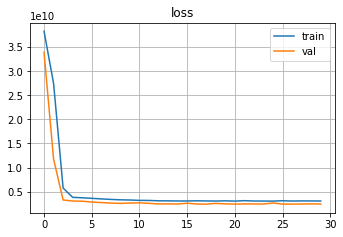

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 3833824256.0000


3833824256.0

In [ ]:
y_pred = model.predict(X_test)

### ★ Functional API

In [ ]:
K.clear_session()
input_tensor = Input(shape=(2,))
x = layers.Dense(units=64, activation='relu')(input_tensor)
x = layers.Dense(units=64, activation='relu')(x)
output_tensor = layers.Dense(units=1, activation='relu')(x)

model = Model(input_tensor, output_tensor)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='mean_squared_error')

model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 38727913472.0000 - val_loss: 35921334272.0000
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 37109035008.0000 - val_loss: 33694103552.0000
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 33855170560.0000 - val_loss: 29196630016.0000
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 27909502976.0000 - val_loss: 21867520000.0000
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 19426631680.0000 - val_loss: 13022170112.0000
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 10866397184.0000 - val_loss: 6162952192.0000
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 5557615104.0000 - val_loss: 3528218624.0000
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 4085173504.0000 - val_loss: 3268497664.0000
Epoch 9/30
32/32 [==============================] - 0s 2ms/st

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 4020385024.0000


4020385024.0

In [ ]:
y_pred = model.predict(X_test)

### ★ Model Subclassing

In [ ]:
# Utils
EPOCHS = 30
BATCH_SIZE = 20

In [ ]:
class TestModel03(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(units=2)
        self.activation1 = layers.LeakyReLU(alpha=0.3)
        self.batch_norm = layers.BatchNormalization()
        self.fc2 = layers.Dense(units=64)
        self.activation2 = layers.LeakyReLU(alpha=0.3)
        self.out = layers.Dense(units=1)
        self.activation_out = layers.ReLU()

    def call(self, input, training=None):
        x = self.activation1(self.fc1(input))
        x = self.batch_norm(x, training=training)
        x = self.activation2(self.fc2(x))
        x = self.activation_out(self.out(x))
        return x

In [ ]:
# 最適化アルゴリズム
optimizer = tf.keras.optimizers.Adam()

# 損失関数
loss_object = tf.keras.losses.MeanSquaredError()

# 評価関数
train_loss = tf.keras.metrics.Mean()
valid_loss = tf.keras.metrics.Mean()

# 入力データ
X_train_f32 = X_train.astype('float32')
y_train_f32 = y_train.astype('float32')
X_val_f32 = X_val.astype('float32')
y_val_f32 = y_val.astype('float32')

# TensorSliceDataset
train_sliced = tf.data.Dataset.from_tensor_slices((X_train_f32, y_train_f32))
valid_sliced = tf.data.Dataset.from_tensor_slices((X_val_f32, y_val_f32))

# BatchDataset
train_dataset = train_sliced.shuffle(len(train_sliced)).batch(BATCH_SIZE)
valid_dataset = valid_sliced.batch(BATCH_SIZE)

In [ ]:
# 学習用
def train_step(train_X, train_y):
    training = True
    K.set_learning_phase(training)

    with tf.GradientTape() as tape:
        pred_y = model(train_X, training=training)
        loss = loss_object(pred_y, train_y)

    gradient = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradient, model.trainable_weights))

    train_loss(loss)

In [ ]:
# 検証用
def valid_step(valid_X, valid_y):
    training = False
    K.set_learning_phase(training)

    pred_y = model(valid_X, training=training)
    loss = loss_object(pred_y, valid_y)

    valid_loss(loss)

In [ ]:
# 損失履歴
train_history = []
valid_history = []

# main
model = TestModel03()

for epoch in tqdm(range(EPOCHS)):
    train_loss.reset_states()
    valid_loss.reset_states()

    for train_X, train_y in train_dataset:
        train_step(train_X, train_y)

    for valid_X, valid_y in valid_dataset:
        valid_step(valid_X, valid_y)

    avg_loss = train_loss.result()
    avg_val_loss = valid_loss.result()

    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, val_loss: {:.5f}'\
          .format(epoch, EPOCHS, avg_loss, avg_val_loss))
    
print('Finished Training')

# predict
y_pred = model(X_test)

[Epoch 0/30] loss: 39199285248.00000, val_loss: 36915507200.00000
[Epoch 1/30] loss: 39189561344.00000, val_loss: 36915421184.00000
[Epoch 2/30] loss: 39225380864.00000, val_loss: 36915023872.00000
[Epoch 3/30] loss: 39219916800.00000, val_loss: 36913905664.00000
[Epoch 4/30] loss: 39247048704.00000, val_loss: 36911865856.00000
[Epoch 5/30] loss: 39217717248.00000, val_loss: 36908597248.00000
[Epoch 6/30] loss: 39155740672.00000, val_loss: 36904296448.00000
[Epoch 7/30] loss: 39174635520.00000, val_loss: 36898619392.00000
[Epoch 8/30] loss: 39275556864.00000, val_loss: 36885622784.00000
[Epoch 9/30] loss: 39278780416.00000, val_loss: 36872359936.00000
[Epoch 10/30] loss: 39156776960.00000, val_loss: 36855791616.00000
[Epoch 11/30] loss: 39203561472.00000, val_loss: 36821536768.00000
[Epoch 12/30] loss: 39230353408.00000, val_loss: 36808052736.00000
[Epoch 13/30] loss: 39226859520.00000, val_loss: 36799029248.00000
[Epoch 14/30] loss: 39155920896.00000, val_loss: 36781355008.00000
[Epoc

In [ ]:
np.mean(tf.keras.losses.MSE(y_pred, y_test))

39097081922.03082

## 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。



In [ ]:
# データ読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# テスト実行用
train_ln = 20000
test_ln = 10000

X_train = X_train[:train_ln, :, :, np.newaxis]
y_train = y_train[:train_ln]
X_test = X_test[:test_ln, :, :, np.newaxis]
y_test = y_test[:test_ln]

def y_one_hot(y):
    y_onehot = np.zeros([len(y), 10])
    for i, yk in enumerate(y):
        y_onehot[i,yk] = 1
    return y_onehot
y_train = y_one_hot(y_train)
y_test = y_one_hot(y_test)

# shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((20000, 28, 28, 1), (20000, 10), (10000, 28, 28, 1), (10000, 10))

### ★ Squential

In [ ]:
K.clear_session()

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
313/313 [==============================] - 1s 5ms/step - loss: 1.6748 - accuracy: 0.4092 - val_loss: 1.0894 - val_accuracy: 0.6512
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.9056 - accuracy: 0.7117 - val_loss: 0.6817 - val_accuracy: 0.7975
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 0.6226 - accuracy: 0.8135 - val_loss: 0.5235 - val_accuracy: 0.8445
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.8518 - val_loss: 0.4672 - val_accuracy: 0.8554
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.8680 - val_loss: 0.4079 - val_accuracy: 0.8753
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3796 - accuracy: 0.8853 - val_loss: 0.3845 - val_accuracy: 0.8834
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8958 - val_loss: 0.3129 - val_accuracy: 0.9078
Epoch 

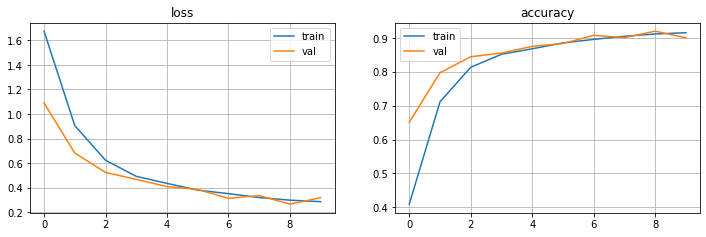

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='val')
ax2.set_title('accuracy')
ax2.grid(True)
ax2.legend(loc='best')
plt.show()

### ★ Functional API

In [ ]:
K.clear_session()
input_tensor = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
history = model.fit(X_train, 
                    y_train,
                    epochs=10,
                    batch_size=30,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/10
667/667 [==============================] - 3s 4ms/step - loss: 0.3580 - accuracy: 0.8902 - val_loss: 0.0857 - val_accuracy: 0.9720
Epoch 2/10
667/667 [==============================] - 2s 4ms/step - loss: 0.1231 - accuracy: 0.9643 - val_loss: 0.0702 - val_accuracy: 0.9765
Epoch 3/10
667/667 [==============================] - 3s 4ms/step - loss: 0.0841 - accuracy: 0.9754 - val_loss: 0.0473 - val_accuracy: 0.9850
Epoch 4/10
667/667 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 5/10
667/667 [==============================] - 3s 4ms/step - loss: 0.0543 - accuracy: 0.9826 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 6/10
667/667 [==============================] - 2s 4ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 7/10
667/667 [==============================] - 2s 4ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 

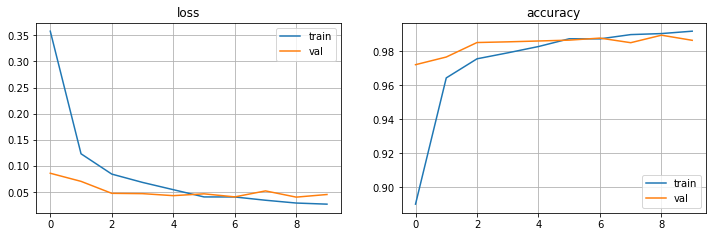

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='val')
ax2.set_title('accuracy')
ax2.grid(True)
ax2.legend(loc='best')
plt.show()

### ★ Model Subclassing

In [ ]:
K.clear_session()

BATCH_SIZE = 64
EPOCHS = 30

class TestModel04(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1))
        self.activation1 = layers.LeakyReLU(alpha=0.3)
        self.max_pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(64, (3, 3))
        self.activation2 = layers.LeakyReLU(alpha=0.3)
        self.max_pool2 = layers.MaxPooling2D((2, 2))
        self.avg_pool3 = layers.GlobalAveragePooling2D()
        self.dense1 = layers.Dense(64)
        self.activation4 = layers.LeakyReLU(alpha=0.3)
        self.dropout = layers.Dropout(0.3)
        self.out = layers.Dense(10)
        self.activation_out = layers.Softmax()

    def call(self, input, training=None):
        x = self.activation1(self.conv1(input))
        x = self.max_pool1(x)
        x = self.activation2(self.conv2(x))
        x = self.max_pool2(x)
        x = self.avg_pool3(x)
        x = self.activation4(self.dense1(x))
        x = self.dropout(x, training=training)
        x = self.activation_out(self.out(x))
        return x

# 最適化アルゴリズム
optimizer = tf.keras.optimizers.Adam()

# 損失関数
loss_object = tf.keras.losses.MeanSquaredError()

# 評価関数
train_loss = tf.keras.metrics.Mean()
train_accuracy = tf.keras.metrics.Accuracy()
valid_loss = tf.keras.metrics.Mean()
valid_accuracy = tf.keras.metrics.Accuracy()

# 入力データ
X_train_f32 = X_train.astype('float32')
y_train_f32 = y_train.astype('float32')
X_val_f32 = X_test.astype('float32')
y_val_f32 = y_test.astype('float32')

# TensorSliceDataset
train_sliced = tf.data.Dataset.from_tensor_slices((X_train_f32, y_train_f32))
valid_sliced = tf.data.Dataset.from_tensor_slices((X_val_f32, y_val_f32))

# BatchDataset
train_dataset = train_sliced.shuffle(len(train_sliced)).batch(BATCH_SIZE)
valid_dataset = valid_sliced.batch(BATCH_SIZE)

# 学習用
@tf.function
def train_step(train_X, train_y):
    training = True
    K.set_learning_phase(training)

    with tf.GradientTape() as tape:
        pred_y = model(train_X, training=training)
        loss = loss_object(pred_y, train_y)

    gradient = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradient, model.trainable_weights))

    train_loss(loss)
    train_accuracy(train_y, K.round(pred_y))

# 検証用
@tf.function
def valid_step(valid_X, valid_y):
    training = False
    K.set_learning_phase(training)

    pred_y = model(valid_X, training=training)
    loss = loss_object(pred_y, valid_y)

    valid_loss(loss)
    valid_accuracy(valid_y, K.round(pred_y))

# 損失履歴
train_history = []
valid_history = []

# main
model = TestModel04()

for epoch in tqdm(range(EPOCHS)):
    train_loss.reset_states()
    train_accuracy.reset_states()
    valid_loss.reset_states()
    valid_accuracy.reset_states()

    for train_X, train_y in train_dataset:
        train_step(train_X, train_y)

    for valid_X, valid_y in valid_dataset:
        valid_step(valid_X, valid_y)

    avg_loss = train_loss.result()
    avg_acc = train_accuracy.result()
    avg_val_loss = valid_loss.result()
    avg_val_acc = valid_accuracy.result()

    train_history.append(avg_loss)
    valid_history.append(avg_val_loss)

    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, acc: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f}'\
          .format(epoch, EPOCHS, avg_loss, avg_acc, avg_val_loss, avg_val_acc))
    
print('Finished Training')

# predict
# y_pred = model(X_test)

[Epoch 0/30] loss: 0.06858, acc: 0.91478, val_loss: 0.04268, val_acc: 0.94202
[Epoch 1/30] loss: 0.03690, acc: 0.95112, val_loss: 0.02610, val_acc: 0.96615
[Epoch 2/30] loss: 0.02679, acc: 0.96540, val_loss: 0.02133, val_acc: 0.97182
[Epoch 3/30] loss: 0.02185, acc: 0.97217, val_loss: 0.01646, val_acc: 0.97944
[Epoch 4/30] loss: 0.01838, acc: 0.97671, val_loss: 0.01436, val_acc: 0.98166
[Epoch 5/30] loss: 0.01675, acc: 0.97873, val_loss: 0.01358, val_acc: 0.98261
[Epoch 6/30] loss: 0.01482, acc: 0.98151, val_loss: 0.01347, val_acc: 0.98276
[Epoch 7/30] loss: 0.01386, acc: 0.98251, val_loss: 0.01025, val_acc: 0.98728
[Epoch 8/30] loss: 0.01325, acc: 0.98311, val_loss: 0.01099, val_acc: 0.98584
[Epoch 9/30] loss: 0.01241, acc: 0.98448, val_loss: 0.00941, val_acc: 0.98825
[Epoch 10/30] loss: 0.01149, acc: 0.98518, val_loss: 0.00957, val_acc: 0.98776
[Epoch 11/30] loss: 0.01107, acc: 0.98604, val_loss: 0.00946, val_acc: 0.98811
[Epoch 12/30] loss: 0.01068, acc: 0.98672, val_loss: 0.00830, 

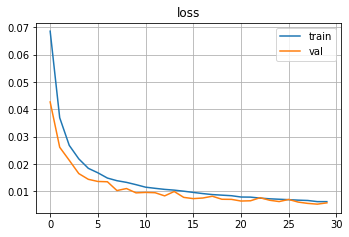

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(train_history, label='train')
ax1.plot(valid_history, label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

plt.show()

## 【問題7】（アドバンス課題）PyTorchへの書き換え
4種類の問題をPyTorchに書き換えてください。

### ■ Iris（2値分類）

In [ ]:
# CSV読み込み
df = pd.read_csv(os.path.join(PATH, 'Iris.csv'))
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]
# y = y.squeeze()
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=True)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((64, 4), (20, 4), (16, 4), (64, 1), (20, 1), (16, 1))

In [ ]:
# %%timeit
# 定数
BATCH_SIZE = 30
EPOCHS = 30
INPUT_FEATURES = 4
OUTPUT_FEATURES = 1

# Dataset
def data_set(X, y):
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).float()
    dataset = torch.utils.data.TensorDataset(X, y)
    return dataset

# DataLoader
def data_loader(train_X, train_y, valid_X, valid_y):
    train_dataset = data_set(train_X, train_y)
    valid_dataset = data_set(valid_X, valid_y)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=BATCH_SIZE)
    return train_loader, valid_loader

# モデル
class PyTorchModel01(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, OUTPUT_FEATURES)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x


# 学習用
def train_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.train()
    optimizer.zero_grad()              # 勾配リセット
    outputs = net(inputs)              # 順伝播
    loss = criterion(outputs, labels)  # 損失計算
    loss.backward()                    # 自動微分計算
    optimizer.step()                   # 更新

    with torch.no_grad():    # 自動微分用の勾配生成停止。メモリ使用量軽減・速度向上が見込める？
        outputs = (outputs > 0.5).float()
        acc = torch.sum(outputs == labels)

    return loss.item(), acc.item()


# 検証用
def valid_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.eval()
    with torch.no_grad():
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        outputs = (outputs > 0.5).float()
        acc = torch.sum(outputs == labels)

    return loss.item(), acc.item()


# initializer
def init_params(layer):
    if type(layer) == nn.Linear:
        # nn.init.xavier_uniform_(layer.weight)   # xavier
        nn.init.kaiming_normal_(layer.weight)   # He
        layer.bias.data.fill_(0.0)


# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device :', device)
# torch.backends.cudnn.benchmark = True

# 学習履歴保管用
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

net = PyTorchModel01().to(device)  # インスタンス化
net.apply(init_params)             # w,bの初期化

# コスト関数、最適化手法
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(),   # 最適化で更新対象のパラメーター（重みやバイアス）
                       lr=0.01,              # 更新時の学習率
                       weight_decay=0.01)    # L2正則化（※不要な場合は0か省略）

train_loader, valid_loader = data_loader(X_train, y_train, X_val, y_val)

for epoch in tqdm(range(EPOCHS)):
    train_loss = 0
    train_acc = 0
    valid_loss = 0
    valid_acc = 0

    for inputs, labels in train_loader:
        loss, acc = train_step(inputs, labels)
        train_loss += loss
        train_acc += acc

    for inputs, labels in valid_loader:
        loss, acc = valid_step(inputs, labels)
        valid_loss += loss
        valid_acc += acc

    avg_loss = train_loss / len(train_loader.dataset)
    avg_acc = train_acc / len(train_loader.dataset)
    avg_val_loss = valid_loss / len(valid_loader.dataset)
    avg_val_acc = valid_acc / len(valid_loader.dataset)

    train_loss_list.append(avg_loss)
    train_acc_list.append(avg_acc)
    valid_loss_list.append(avg_val_loss)
    valid_acc_list.append(avg_val_acc)
    
    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, acc: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f}'\
          .format(epoch+1, EPOCHS, avg_loss, avg_acc, avg_val_loss, avg_val_acc))

print('Finished Training')

device : cuda


[Epoch 1/30] loss: 0.13782, acc: 0.45312, val_loss: 0.20183, val_acc: 0.37500
[Epoch 2/30] loss: 0.11954, acc: 0.53125, val_loss: 0.06128, val_acc: 0.37500
[Epoch 3/30] loss: 0.09267, acc: 0.54688, val_loss: 0.04853, val_acc: 0.62500
[Epoch 4/30] loss: 0.07343, acc: 0.50000, val_loss: 0.03849, val_acc: 0.68750
[Epoch 5/30] loss: 0.05961, acc: 0.62500, val_loss: 0.04658, val_acc: 0.37500
[Epoch 6/30] loss: 0.05052, acc: 0.65625, val_loss: 0.03385, val_acc: 0.93750
[Epoch 7/30] loss: 0.03204, acc: 0.62500, val_loss: 0.03809, val_acc: 0.62500
[Epoch 8/30] loss: 0.03437, acc: 0.56250, val_loss: 0.02912, val_acc: 0.87500
[Epoch 9/30] loss: 0.03503, acc: 0.60938, val_loss: 0.03495, val_acc: 0.50000
[Epoch 10/30] loss: 0.03311, acc: 0.62500, val_loss: 0.02780, val_acc: 0.81250
[Epoch 11/30] loss: 0.03072, acc: 0.71875, val_loss: 0.02241, val_acc: 0.87500
[Epoch 12/30] loss: 0.02769, acc: 0.68750, val_loss: 0.02098, val_acc: 0.93750
[Epoch 13/30] loss: 0.02297, acc: 0.78125, val_loss: 0.02107,

In [ ]:
# X_test = torch.from_numpy(X_test).float()
# y_pred = (net(X_test) > 0.5).float()
# print(y_pred)
# print(y_test.squeeze())
# acc = (y_pred == y_test.squeeze()).sum() / len(y_test)
# print(acc)

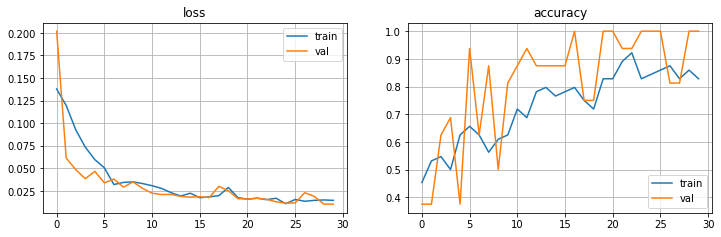

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(train_loss_list, label='train')
ax1.plot(valid_loss_list, label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(train_acc_list, label='train')
ax2.plot(valid_acc_list, label='val')
ax2.set_title('accuracy')
ax2.grid(True)
ax2.legend(loc='best')
plt.show()

### ■ Iris（多値分類）

#### メモ（ポイント）
- 教師データをone-hotにする必要なし
- 教師データは1次元配列とする
- loss関数は CrossEntropyLoss を使用。（出力層はsoftmaxを使用）
- 他にも、出力層のactivationをlog_softmaxにして、loss関数をNLLLossとする方法もあり。

In [ ]:
# CSV読み込み
df = pd.read_csv(os.path.join(PATH, 'Iris.csv'))
df['Species'].unique()
# データフレームから条件抽出
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]
# One-Hot
# y = to_categorical(y)
y = y.squeeze()

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, shuffle=True)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99, shuffle=True)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((96, 4), (30, 4), (24, 4), (96,), (30,), (24,))

In [ ]:
# %%timeit
# 定数
BATCH_SIZE = 30
EPOCHS = 30
INPUT_FEATURES = 4
OUTPUT_FEATURES = 3

# Dataset
def data_set(X, y):
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).long()
    dataset = torch.utils.data.TensorDataset(X, y)
    return dataset

# DataLoader
def data_loader(train_X, train_y, valid_X, valid_y):
    train_dataset = data_set(train_X, train_y)
    valid_dataset = data_set(valid_X, valid_y)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=BATCH_SIZE)
    return train_loader, valid_loader

# モデル
class PyTorchModel02(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, OUTPUT_FEATURES)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.softmax(self.fc3(x), dim=1)
        return x


# 学習用
def train_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.train()
    optimizer.zero_grad()              # 勾配リセット
    outputs = net(inputs)              # 順伝播
    loss = criterion(outputs, labels)  # 損失計算
    loss.backward()                    # 自動微分計算
    optimizer.step()                   # 更新

    with torch.no_grad():    # 自動微分用の勾配生成停止。メモリ使用量軽減・速度向上が見込める？
        acc = torch.sum(outputs.max(axis=1)[1] == labels)

    return loss.item(), acc.item()


# 検証用
def valid_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.eval()
    with torch.no_grad():
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        acc = torch.sum(outputs.max(axis=1)[1] == labels)
    return loss.item(), acc.item()


# initializer
def init_params(layer):
    if type(layer) == nn.Linear:
        # nn.init.xavier_uniform_(layer.weight)   # xavier
        nn.init.kaiming_normal_(layer.weight)   # He
        layer.bias.data.fill_(0.0)


# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device :', device)
# torch.backends.cudnn.benchmark = True

# 学習履歴保管用
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

net = PyTorchModel02().to(device)  # インスタンス化
net.apply(init_params)             # w,bの初期化

# コスト関数、最適化手法
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),   # 最適化で更新対象のパラメーター（重みやバイアス）
                       lr=0.01,              # 更新時の学習率
                       weight_decay=0.01)    # L2正則化（※不要な場合は0か省略）

train_loader, valid_loader = data_loader(X_train, y_train, X_val, y_val)

for epoch in tqdm(range(EPOCHS)):
    train_loss = 0
    train_acc = 0
    valid_loss = 0
    valid_acc = 0

    for inputs, labels in train_loader:
        loss, acc = train_step(inputs, labels)
        train_loss += loss
        train_acc += acc

    for inputs, labels in valid_loader:
        loss, acc = valid_step(inputs, labels)
        valid_loss += loss
        valid_acc += acc

    avg_loss = train_loss / len(train_loader.dataset)
    avg_acc = train_acc / len(train_loader.dataset)
    avg_val_loss = valid_loss / len(valid_loader.dataset)
    avg_val_acc = valid_acc / len(valid_loader.dataset)

    train_loss_list.append(avg_loss)
    train_acc_list.append(avg_acc)
    valid_loss_list.append(avg_val_loss)
    valid_acc_list.append(avg_val_acc)
    
    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, acc: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f}'\
          .format(epoch+1, EPOCHS, avg_loss, avg_acc, avg_val_loss, avg_val_acc))

print('Finished Training')

device : cuda


[Epoch 1/30] loss: 0.04596, acc: 0.35417, val_loss: 0.04141, val_acc: 0.54167
[Epoch 2/30] loss: 0.03680, acc: 0.58333, val_loss: 0.03596, val_acc: 0.66667
[Epoch 3/30] loss: 0.03701, acc: 0.65625, val_loss: 0.03686, val_acc: 0.66667
[Epoch 4/30] loss: 0.03663, acc: 0.66667, val_loss: 0.03687, val_acc: 0.66667
[Epoch 5/30] loss: 0.03619, acc: 0.68750, val_loss: 0.03687, val_acc: 0.66667
[Epoch 6/30] loss: 0.03482, acc: 0.68750, val_loss: 0.03687, val_acc: 0.66667
[Epoch 7/30] loss: 0.03896, acc: 0.68750, val_loss: 0.03687, val_acc: 0.66667
[Epoch 8/30] loss: 0.03634, acc: 0.67708, val_loss: 0.03686, val_acc: 0.66667
[Epoch 9/30] loss: 0.03466, acc: 0.68750, val_loss: 0.03652, val_acc: 0.66667
[Epoch 10/30] loss: 0.03627, acc: 0.67708, val_loss: 0.03671, val_acc: 0.66667
[Epoch 11/30] loss: 0.03611, acc: 0.67708, val_loss: 0.03686, val_acc: 0.66667
[Epoch 12/30] loss: 0.03470, acc: 0.68750, val_loss: 0.03686, val_acc: 0.66667
[Epoch 13/30] loss: 0.03616, acc: 0.68750, val_loss: 0.03687,

### ■ House Prices

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint13/data/train.csv')
X = np.array(df[['GrLivArea', 'YearBuilt']].copy())
y = np.array(df[['SalePrice']])
X.shape, y.shape

((1460, 2), (1460, 1))

In [ ]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# # さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
# %%timeit
# 定数
BATCH_SIZE = 30
EPOCHS = 30
INPUT_FEATURES = 2
OUTPUT_FEATURES = 1

# Dataset
def data_set(X, y):
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).float()
    dataset = torch.utils.data.TensorDataset(X, y)
    return dataset

# DataLoader
def data_loader(train_X, train_y, valid_X, valid_y):
    train_dataset = data_set(train_X, train_y)
    valid_dataset = data_set(valid_X, valid_y)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=BATCH_SIZE)
    return train_loader, valid_loader

# モデル
class PyTorchModel03(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, OUTPUT_FEATURES)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        return x


# 学習用
def train_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.train()
    optimizer.zero_grad()              # 勾配リセット
    outputs = net(inputs)              # 順伝播
    loss = criterion(outputs, labels)  # 損失計算
    loss.backward()                    # 自動微分計算
    optimizer.step()                   # 更新

    return loss.item()


# 検証用
def valid_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.eval()
    with torch.no_grad():
        outputs = net(inputs)
        loss = criterion(outputs, labels)

    return loss.item()


# initializer
def init_params(layer):
    if type(layer) == nn.Linear:
        # nn.init.xavier_uniform_(layer.weight)   # xavier
        nn.init.kaiming_normal_(layer.weight)   # He
        layer.bias.data.fill_(0.0)


# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device :', device)
# torch.backends.cudnn.benchmark = True

# 学習履歴保管用
train_loss_list = []
valid_loss_list = []

net = PyTorchModel03().to(device)  # インスタンス化
net.apply(init_params)             # w,bの初期化

# コスト関数、最適化手法
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(),   # 最適化で更新対象のパラメーター（重みやバイアス）
                       lr=0.01,              # 更新時の学習率
                       weight_decay=0.01)    # L2正則化（※不要な場合は0か省略）

train_loader, valid_loader = data_loader(X_train, y_train, X_val, y_val)

for epoch in tqdm(range(EPOCHS)):
    train_loss = 0
    valid_loss = 0

    for inputs, labels in train_loader:
        loss = train_step(inputs, labels)
        train_loss += loss

    for inputs, labels in valid_loader:
        loss = valid_step(inputs, labels)
        valid_loss += loss

    avg_loss = train_loss / len(train_loader.dataset)
    avg_val_loss = valid_loss / len(valid_loader.dataset)

    train_loss_list.append(avg_loss)
    valid_loss_list.append(avg_val_loss)
    
    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, val_loss: {:.5f}'\
          .format(epoch+1, EPOCHS, avg_loss, avg_val_loss))

print('Finished Training')

device : cuda


[Epoch 1/30] loss: 503125446.71520, val_loss: 108728340.78632
[Epoch 2/30] loss: 138165686.47537, val_loss: 85306937.43590
[Epoch 3/30] loss: 137081299.73448, val_loss: 84938736.13675
[Epoch 4/30] loss: 135991851.03212, val_loss: 89368287.17949
[Epoch 5/30] loss: 128143612.71092, val_loss: 85553744.41026
[Epoch 6/30] loss: 128583802.92934, val_loss: 83130129.50427
[Epoch 7/30] loss: 133343581.32762, val_loss: 83593136.68376
[Epoch 8/30] loss: 132128330.82655, val_loss: 84131720.20513
[Epoch 9/30] loss: 125675428.17987, val_loss: 83333071.86325
[Epoch 10/30] loss: 129332955.27195, val_loss: 84013816.88889
[Epoch 11/30] loss: 122801836.12848, val_loss: 83465953.91453
[Epoch 12/30] loss: 127572624.30835, val_loss: 84623188.23932
[Epoch 13/30] loss: 125761506.94647, val_loss: 84505398.70085
[Epoch 14/30] loss: 124531130.17559, val_loss: 86902654.90598
[Epoch 15/30] loss: 129384414.42398, val_loss: 83900224.54701
[Epoch 16/30] loss: 120972459.54604, val_loss: 84115913.84615
[Epoch 17/30] lo

### ■ MNIST

#### メモ（ポイント）
- 入力は（batch, channel, img_h, img_w）※kerasは（batch, img_h, img_w, channel）
- Conv2d層への引数は入出力のチャンネル数だけで良く、画像サイズを指定する必要がない。

In [ ]:
# データ読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

# shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# テスト実行用
train_ln = 20000
test_ln = 10000

X_train = X_train[:train_ln, np.newaxis, :, :]
y_train = y_train[:train_ln]
X_test = X_test[:test_ln, np.newaxis, :, :]
y_test = y_test[:test_ln]

X_val = X_test
y_val = y_test

# shape
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((20000, 1, 28, 28), (20000,), (10000, 1, 28, 28), (10000,))

In [ ]:
# %%timeit
# 定数
BATCH_SIZE = 64
EPOCHS = 30
# INPUT_FEATURES = 28
OUTPUT_FEATURES = 10

# Dataset
def data_set(X, y):
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).long()
    dataset = torch.utils.data.TensorDataset(X, y)
    return dataset

# DataLoader
def data_loader(train_X, train_y, valid_X, valid_y):
    train_dataset = data_set(train_X, train_y)
    valid_dataset = data_set(valid_X, valid_y)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=BATCH_SIZE)
    return train_loader, valid_loader

# モデル
class PyTorchModel04(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=(1, 1))
        # self.pool1 = nn.MaxPool2d(kernel_size=2)
        # self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        # self.pool2 = nn.MaxPool2d(kernel_size=2)
        # self.avg_pool = nn.AdaptiveAvgPool2d(1)

        # self.fc1 = nn.Linear(64, 64)
        # self.dropout = nn.Dropout(0.3)
        # self.out = nn.Linear(64, OUTPUT_FEATURES)

        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=(1, 1)),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, OUTPUT_FEATURES)
        )

    def forward(self, x):
        # x = F.leaky_relu(self.conv1(x))
        # x = self.pool1(x)
        # x = F.leaky_relu(self.conv2(x))
        # x = self.pool2(x)
        # x = self.avg_pool(x)
        # x = x.view(x.size(0), -1)
        # x = F.leaky_relu(self.fc1(x))
        # x = self.dropout(x)
        # x = F.softmax(self.out(x), dim=1)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        x = F.relu(x)
        return x


# 学習用
def train_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.train()
    optimizer.zero_grad()              # 勾配リセット
    outputs = net(inputs)              # 順伝播
    loss = criterion(outputs, labels)  # 損失計算
    loss.backward()                    # 自動微分計算
    optimizer.step()                   # 更新

    with torch.no_grad():    # 自動微分用の勾配生成停止。メモリ使用量軽減・速度向上が見込める？
        acc = torch.sum(outputs.max(axis=1)[1] == labels)

    return loss.item(), acc.item()


# 検証用
def valid_step(inputs, labels):
    inputs, labels = inputs.to(device), labels.to(device)
    net.eval()
    with torch.no_grad():
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        acc = torch.sum(outputs.max(axis=1)[1] == labels)
    return loss.item(), acc.item()


# initializer
def init_params(layer):
    if type(layer) == nn.Linear:
        # nn.init.xavier_uniform_(layer.weight)   # xavier
        nn.init.kaiming_normal_(layer.weight)   # He
        layer.bias.data.fill_(0.0)


# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device :', device)
# torch.backends.cudnn.benchmark = True

# 学習履歴保管用
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

net = PyTorchModel04().to(device)  # インスタンス化
net.apply(init_params)             # w,bの初期化

# コスト関数、最適化手法
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters()   # 最適化で更新対象のパラメーター（重みやバイアス）
                    #    lr=0.01,              # 更新時の学習率
                    #    weight_decay=0.01     # L2正則化（※不要な場合は0か省略）
)

train_loader, valid_loader = data_loader(X_train, y_train, X_val, y_val)

for epoch in tqdm(range(EPOCHS)):
    train_loss = 0
    train_acc = 0
    valid_loss = 0
    valid_acc = 0

    for inputs, labels in train_loader:
        loss, acc = train_step(inputs, labels)
        train_loss += loss
        train_acc += acc

    for inputs, labels in valid_loader:
        loss, acc = valid_step(inputs, labels)
        valid_loss += loss
        valid_acc += acc

    avg_loss = train_loss / len(train_loader.dataset)
    avg_acc = train_acc / len(train_loader.dataset)
    avg_val_loss = valid_loss / len(valid_loader.dataset)
    avg_val_acc = valid_acc / len(valid_loader.dataset)

    train_loss_list.append(avg_loss)
    train_acc_list.append(avg_acc)
    valid_loss_list.append(avg_val_loss)
    valid_acc_list.append(avg_val_acc)
    
    # 学習履歴表示
    print('[Epoch {}/{}] loss: {:.5f}, acc: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f}'\
          .format(epoch+1, EPOCHS, avg_loss, avg_acc, avg_val_loss, avg_val_acc))

print('Finished Training')

device : cuda


[Epoch 1/30] loss: 0.03124, acc: 0.27590, val_loss: 0.02560, val_acc: 0.46880
[Epoch 2/30] loss: 0.02268, acc: 0.52060, val_loss: 0.01782, val_acc: 0.65090
[Epoch 3/30] loss: 0.01593, acc: 0.66360, val_loss: 0.01137, val_acc: 0.76250
[Epoch 4/30] loss: 0.01174, acc: 0.74845, val_loss: 0.00831, val_acc: 0.84060
[Epoch 5/30] loss: 0.01011, acc: 0.78995, val_loss: 0.00757, val_acc: 0.85010
[Epoch 6/30] loss: 0.00894, acc: 0.81615, val_loss: 0.00649, val_acc: 0.87980
[Epoch 7/30] loss: 0.00793, acc: 0.84035, val_loss: 0.00593, val_acc: 0.88610
[Epoch 8/30] loss: 0.00708, acc: 0.86080, val_loss: 0.00508, val_acc: 0.90610
[Epoch 9/30] loss: 0.00644, acc: 0.87265, val_loss: 0.00459, val_acc: 0.91470
[Epoch 10/30] loss: 0.00593, acc: 0.88555, val_loss: 0.00437, val_acc: 0.91390
[Epoch 11/30] loss: 0.00539, acc: 0.89590, val_loss: 0.00347, val_acc: 0.93390
[Epoch 12/30] loss: 0.00513, acc: 0.90050, val_loss: 0.00347, val_acc: 0.93410
[Epoch 13/30] loss: 0.00478, acc: 0.90685, val_loss: 0.00355,

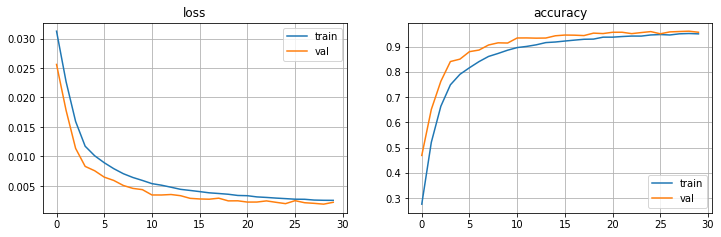

In [ ]:
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(train_loss_list, label='train')
ax1.plot(valid_loss_list, label='val')
ax1.set_title('loss')
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(train_acc_list, label='train')
ax2.plot(valid_acc_list, label='val')
ax2.set_title('accuracy')
ax2.grid(True)
ax2.legend(loc='best')
plt.show()

## 【問題8】（アドバンス課題）フレームワークの比較
それぞれのフレームワークにはどのような違いがあるかをまとめてください。


《視点例》


- 計算速度
- コードの行数・可読性
- 用意されている機能

- GPUの使用について
  - TensorFlow/keras
    - 自動でGPUを識別して使用してくれる？ので楽
    - AUTOTUNE = tf.data.experimental.AUTOTUNE など、処理を効率化する方法が複数ある様子（PyTorchはない？？）
  - PyTorch
    - GPUで計算する変数毎にto('cuda')と指定する必要がある。
    - 上記のため、意図通りにGPUを使用しやすいが、面倒。

<br>

- 計算速度  ※GPUが遅いのはGPUを掴むまでに時間がかかっているから？
  - 条件が全く同じというわけではないが、差は歴然でPyTorchが速い（iris 2値分類で検証）理由はkrasがラッパーだから？？
    - TensorFlow/keras
      - CPU : 1 loop, best of 3: 934 ms per loop
      - GPU : 1 loop, best of 3: 923 ms per loop
      - TPU : 1 loop, best of 3: 694 ms per loop

    - PyTorch
      - CPU : 1 loop, best of 3: 214 ms per loop
      - GPU : 1 loop, best of 3: 278 ms per loop
      - TPU : 10 loops, best of 3: 190 ms per loop


- コードに関して
  - TensorFlow/keras
    - fitがある分、コードが短くて済む。
    - DataLoderを作成するのもcompileで済むので楽。
    - compile, fitで隠蔽されている分、中の処理がいまいちわからないところがある。
    - fit等でエラーになった場合、具体的にどの処理がエラーになっているかがわかりにくくデバッグがしにくい。
    - 出力のノード数（フィルタ数）を指定すればよいので、どのようなshapeでデータが流れているかをさほど意識しなくてもとりあえず動かせる。
  - PyTorch
    - コード量は多いが、実際の処理順に記述できるためイメージはしやすい。
    - DatasetやDataLoderの作成は正直めんどう。（今回は同じコードを使いまわせたが・・・）
    - エラー箇所がkerasよりは明確なためデバッグがしやすい。
    - loss関数の計算処理でエラーになることが多い。（なぜか毎回エラーにしてしまう）
    - ネットワークを作成する際、入力と出力のノード数(フィルタ数)を記述する必要があるため、データのshapeを意識しながら書く必要がある。
    - kerasで書いていたCNNが、実はMaxPoolingの時にちょうどよく割り切れず端数がでていたことに、PyTorchで書いていた時に気づいた。なので入力・出力の両方を指定する仕様は初心者には勉強になる。<br>※MaxPooling層に11×11で入力していたため、2×2のMaxPoolingにより出力が5×5になってしまっていた。
  - まとめ
    - 簡単な予測モデルをサクっと作りたいときにはkerasを、<br>しっかりとしたモデルを時間をかけて作成したい場合・重い計算処理をする場合にはPyTorchを使おうと思う。